In [1]:
pip install sklearn-genetic 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mordred import Calculator, descriptors
import seaborn as sns
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings

In [2]:
df = pd.read_csv('df_no_chiral.csv')

In [3]:
def All_Mordred_descriptors(df):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in df]
    df = calc.pandas(mols)
    return df
mordred_descriptors = All_Mordred_descriptors(df['SMILES'])

  1%|          | 7/1193 [00:02<06:42,  2.94it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 12/1193 [00:03<04:05,  4.82it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|▏         | 15/1193 [00:04<04:15,  4.61it/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1193/1193 [05:03<00:00,  3.93it/s]


In [4]:
X = mordred_descriptors
Y = df.pIC50

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 25 )

In [6]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors= 10)     
X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)
X_train_imp_df = pd.DataFrame(X_train_imp)
X_test_imp_df = pd.DataFrame(X_test_imp)
X_test_imp_df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0.0,1.0,46.566066,2.465286,4.910426,46.566066,1.330459,4.493348,5.141139,0.146890,...,10.522961,85.231599,470.170253,8.248601,3920.0,58.0,186.0,222.0,9.472222,7.861111
1,0.0,2.0,65.033062,2.515816,5.001321,65.033062,1.300661,4.879753,6.133658,0.122673,...,11.194440,105.331473,710.265128,7.891835,11545.0,84.0,286.0,349.0,14.402778,10.666667
2,0.0,1.0,52.366438,2.398830,4.797659,52.366438,1.309161,4.594756,4.617869,0.115447,...,10.388595,76.578225,541.257671,7.216769,6211.0,59.0,198.0,226.0,11.611111,9.194444
3,0.0,2.0,65.033062,2.515816,5.001321,65.033062,1.300661,4.879753,6.133658,0.122673,...,11.194440,105.331473,712.233159,8.093559,11545.0,84.0,286.0,349.0,14.402778,10.666667
4,0.0,1.0,66.862374,2.479855,4.959711,66.862374,1.285815,4.877842,5.579360,0.107295,...,10.914452,90.604652,733.200249,8.525584,11526.0,88.0,276.0,325.0,16.590278,11.347222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.0,1.0,64.777413,2.406989,4.809925,64.777413,1.270145,4.845449,5.891626,0.115522,...,10.731406,102.670330,732.248140,7.873636,11339.0,79.0,262.0,303.0,17.138889,11.222222
235,1.0,1.0,46.905090,2.459921,4.889112,46.905090,1.302919,4.523072,5.068414,0.140789,...,10.551925,86.781375,523.133255,8.437633,4646.0,60.0,194.0,231.0,10.944444,7.805556
236,0.0,2.0,66.839382,2.545356,5.020276,66.839382,1.336788,4.892585,4.372651,0.087453,...,11.086518,112.127867,714.223657,8.304926,11793.0,84.0,282.0,347.0,14.222222,10.833333
237,1.0,1.0,49.793058,2.398867,4.797734,49.793058,1.310344,4.547593,4.624008,0.121684,...,10.372960,74.424263,508.199822,7.699997,5292.0,57.0,190.0,218.0,11.111111,8.694444


In [7]:
column_to_drop = []
# Remove highly correlated features (abs(R) >= 0.80)

corr_matrix = X_train_imp_df.corr().abs()


up_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
col_corr = [column for column in up_triangle.columns if any(up_triangle[column]>= 0.8)]
for i in range(len(col_corr)):
    column_to_drop.append(col_corr[i])

variances = X_train_imp_df.var()
col_var = variances[variances <= 0.1].index
for j in range(len(col_var)):
    column_to_drop.append(col_var[j])

column_to_drop = list(set(column_to_drop))


X_train_drop = X_train_imp_df.drop(columns= column_to_drop)
X_test_drop = X_test_imp_df.drop(columns=column_to_drop)

In [8]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_drop)
X_test_norm = norm.transform(X_test_drop)
X_train_norm = pd.DataFrame(X_train_norm)
X_test_norm=pd.DataFrame(X_test_norm)

MODEL 1 LINEAR REGRESSION


In [38]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.50,0.426408,0.657505,0.000094,0.500,0.0,0.4,0.0,0.0,...,0.50,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.534223
1,0.0,0.50,0.333954,0.570310,0.000164,0.500,0.0,0.6,1.0,0.0,...,0.00,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.237962
2,0.5,0.25,0.181863,0.540017,0.000012,0.375,0.0,0.4,0.0,0.0,...,0.25,0.285714,0.4,0.5,0.333333,1.0,0.5,0.5,0.0,0.416859
3,1.0,0.50,0.345681,0.569713,0.000072,0.500,0.0,0.8,0.0,0.0,...,0.00,0.428571,0.4,0.0,0.333333,0.5,0.0,0.5,0.0,0.546791
4,0.0,0.50,0.371941,0.620221,0.000062,0.500,0.0,0.4,0.0,0.0,...,0.25,0.428571,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.495473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.0,0.25,0.330825,0.708255,0.000026,0.500,0.0,0.6,0.0,0.0,...,0.25,0.428571,0.2,0.0,0.333333,0.5,0.0,0.5,0.0,0.578431
950,0.0,0.25,0.153297,0.508696,0.000010,0.375,0.0,0.3,0.0,0.0,...,0.25,0.285714,0.4,0.5,0.333333,1.0,0.5,0.5,0.0,0.362692
951,0.0,0.50,0.323633,0.803909,0.000012,0.500,0.0,0.4,0.0,0.0,...,0.00,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.501929
952,0.0,0.25,0.033542,0.334794,0.000024,0.250,0.0,0.2,0.0,0.0,...,0.00,0.142857,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.335316


In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.8915563760411522
r2test:0.8727075827792798
[0.83282463 0.80193738 0.88837034 0.81888444 0.88656427 0.78651773
 0.84043009 0.83721825 0.82380354 0.81246457]
0.8329015245814746


In [40]:
X_train_norm_ = X_train_norm.to_numpy()
X_test_norm_ = X_test_norm.to_numpy()

In [41]:
X_train_drop.shape

(954, 137)

In [42]:
leverage_train = np.diag(X_train_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_train_norm_.T)
leverage_test = np.diag(X_test_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_test_norm_.T)

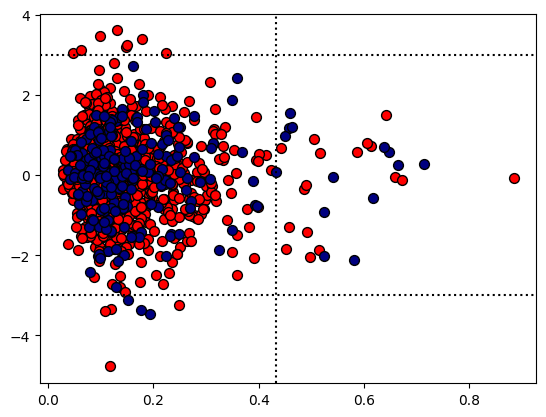

In [43]:
Y_train_model_1 = pd.DataFrame(Y_train)
Y_train_model_1['pred'] = Y_pred_train
Y_train_model_1['residual'] = Y_train_model_1['pIC50'] - Y_train_model_1['pred']
Y_train_model_1['squared'] = Y_train_model_1['residual']**2
mse_train = Y_train_model_1['squared'].sum()/(len(Y_train_model_1['squared']))
Y_train_model_1['leverage'] = leverage_train
Y_train_model_1['standard'] = Y_train_model_1['residual']/(mse_train)**0.5

Y_test_model_1 = pd.DataFrame(Y_test)
Y_test_model_1['pred'] = Y_pred_test
Y_test_model_1['residual'] = Y_test_model_1['pIC50'] - Y_test_model_1['pred']
Y_test_model_1['squared'] = Y_test_model_1['residual']**2
mse_test = Y_test_model_1['squared'].sum()/(len(Y_test_model_1['squared']))
Y_test_model_1['leverage'] = leverage_test
Y_test_model_1['standard'] = Y_test_model_1['residual']/(mse_test)**0.5


plt.scatter(Y_train_model_1['leverage'], Y_train_model_1['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test_model_1['leverage'], Y_test_model_1['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.434, color='black', linestyle='dotted')

In [44]:
leverage_test_ = pd.DataFrame(leverage_test)
print (leverage_test_[leverage_test_>0.434].count())
leverage_train_ = pd.DataFrame(leverage_train)
leverage_train_[leverage_train_>0.4340].count()

0    13
dtype: int64


0    17
dtype: int64

MODEL 2 PARTIAL LEAST REGRESSION

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression

params = {n_components = 2}
model = PLSRegression()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 1)
grid.fit(X_train_drop, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

SyntaxError: invalid syntax (3293649905.py, line 4)

MODEL 3 SVR


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

params = { 'C' : range(1,51,1),
          'epsilon' : [1e-3, 1e-2, 1e-1, 0.5, 1],
          'kernel' : ['rbf', 'poly', 'linear']
          }
model = SVR()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 1)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

Fitting 10 folds for each of 750 candidates, totalling 7500 fits
{'C': 8, 'epsilon': 0.1, 'kernel': 'rbf'}
0.869429453226459


In [46]:
from sklearn.svm import SVR

model = SVR(C=8, epsilon= 0.1, kernel= 'rbf')

model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.9646566865017671
r2test:0.8954583623538224
[0.86692231 0.87411819 0.88897829 0.85474147 0.90287799 0.84869232
 0.84493663 0.88240495 0.84875073 0.88187164]
0.869429453226459


In [48]:
X_train_norm_ = X_train_norm.to_numpy()
X_test_norm_ = X_test_norm.to_numpy()

In [49]:
leverage_train = np.diag(X_train_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_train_norm_.T)
leverage_test = np.diag(X_test_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_test_norm_.T)

0    13
dtype: int64
0    17
dtype: int64


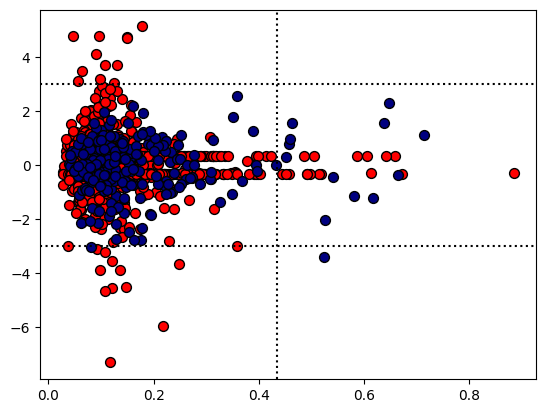

In [52]:
Y_train_model_2 = pd.DataFrame(Y_train)
Y_train_model_2['pred'] = Y_pred_train
Y_train_model_2['residual'] = Y_train_model_2['pIC50'] - Y_train_model_2['pred']
Y_train_model_2['squared'] = Y_train_model_2['residual']**2
mse_train = Y_train_model_2['squared'].sum()/(len(Y_train_model_2['squared']))
Y_train_model_2['leverage'] = leverage_train
Y_train_model_2['standard'] = Y_train_model_2['residual']/(mse_train)**0.5

Y_test_model_2 = pd.DataFrame(Y_test)
Y_test_model_2['pred'] = Y_pred_test
Y_test_model_2['residual'] = Y_test_model_2['pIC50'] - Y_test_model_2['pred']
Y_test_model_2['squared'] = Y_test_model_2['residual']**2
mse_test = Y_test_model_2['squared'].sum()/(len(Y_test_model_2['squared']))
Y_test_model_2['leverage'] = leverage_test
Y_test_model_2['standard'] = Y_test_model_2['residual']/(mse_test)**0.5

leverage_test_ = pd.DataFrame(leverage_test)
print (leverage_test_[leverage_test_>0.434].count())
leverage_train_ = pd.DataFrame(leverage_train)
print(leverage_train_[leverage_train_>0.4340].count())

plt.scatter(Y_train_model_2['leverage'], Y_train_model_2['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test_model_2['leverage'], Y_test_model_2['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.434, color='black', linestyle='dotted')

MODEL 4 KNN


In [53]:
from turtle import distance
from matplotlib.pylab import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = { 'n_neighbors' : range(2,16,1),
            'weights' : [uniform, distance],
            'p' : [1,2]
          }
model = KNeighborsRegressor()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 0)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\ADMIN\AppData\Roami

{'n_neighbors': 2, 'p': 1, 'weights': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x000001CABD49D840>}
0.8452865917724255


C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\ADMIN\AppData\Roami

In [54]:
model = KNeighborsRegressor(n_neighbors= 6, p= 2, weights = uniform)

model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.8690585388804779
r2test:0.8680783859108261
[0.85495301 0.8583581  0.81542434 0.82828394 0.8317469  0.83388675
 0.88552405 0.8474434  0.79422116 0.89272351]
0.8442565160523461


0    13
dtype: int64
0    17
dtype: int64


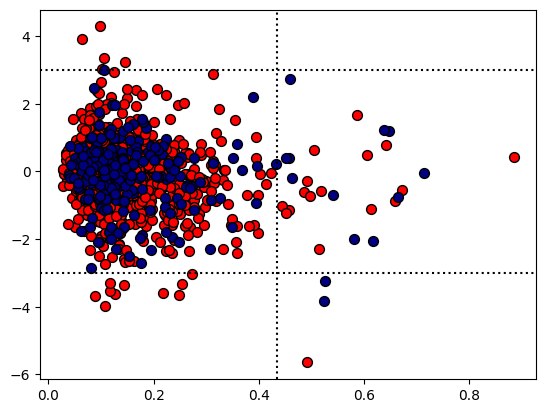

In [55]:
X_train_norm_ = X_train_norm.to_numpy()
X_test_norm_ = X_test_norm.to_numpy()

leverage_train = np.diag(X_train_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_train_norm_.T)
leverage_test = np.diag(X_test_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_test_norm_.T)


Y_train_model_3 = pd.DataFrame(Y_train)
Y_train_model_3['pred'] = Y_pred_train
Y_train_model_3['residual'] = Y_train_model_3['pIC50'] - Y_train_model_3['pred']
Y_train_model_3['squared'] = Y_train_model_3['residual']**2
mse_train = Y_train_model_3['squared'].sum()/(len(Y_train_model_3['squared']))
Y_train_model_3['leverage'] = leverage_train
Y_train_model_3['standard'] = Y_train_model_3['residual']/(mse_train)**0.5

Y_test_model_3= pd.DataFrame(Y_test)
Y_test_model_3['pred'] = Y_pred_test
Y_test_model_3['residual'] = Y_test_model_3['pIC50'] - Y_test_model_3['pred']
Y_test_model_3['squared'] = Y_test_model_3['residual']**2
mse_test = Y_test_model_3['squared'].sum()/(len(Y_test_model_3['squared']))
Y_test_model_3['leverage'] = leverage_test
Y_test_model_3['standard'] = Y_test_model_3['residual']/(mse_test)**0.5

leverage_test = pd.DataFrame(leverage_test)
print(leverage_test[leverage_test>0.434].count())
leverage_train = pd.DataFrame(leverage_train)
print(leverage_train[leverage_train>0.434].count())

plt.scatter(Y_train_model_3['leverage'], Y_train_model_3['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test_model_3['leverage'], Y_test_model_3['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.434, color='black', linestyle='dotted')


MODEL 5 DECISION TREE

In [27]:
from turtle import distance
from matplotlib.pylab import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = { 'max_depth' : range(2,11,1),
'min_samples_split' : range(2,11,1),
'min_samples_leaf' : range(1,11,1),
'random_state' : [25]
          }
model = DecisionTreeRegressor()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 0)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 25}
0.7749002059762755


In [30]:
model = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 2, min_samples_split= 2, random_state= 25
)

model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.8462034659736161
r2test:0.7909007278564284
[0.76352369 0.75363061 0.80184728 0.74874861 0.82727222 0.73800677
 0.82938221 0.75072702 0.78137854 0.75448511]
0.7749002059762755


0    13
dtype: int64
0    17
dtype: int64


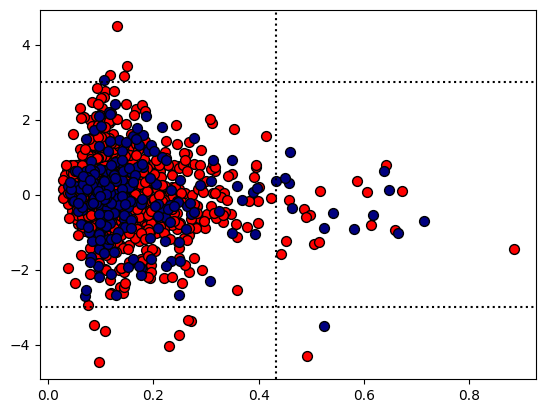

In [31]:
X_train_norm_ = X_train_norm.to_numpy()
X_test_norm_ = X_test_norm.to_numpy()

leverage_train = np.diag(X_train_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_train_norm_.T)
leverage_test = np.diag(X_test_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_test_norm_.T)


Y_train_model_2 = pd.DataFrame(Y_train)
Y_train_model_2['pred'] = Y_pred_train
Y_train_model_2['residual'] = Y_train_model_2['pIC50'] - Y_train_model_2['pred']
Y_train_model_2['squared'] = Y_train_model_2['residual']**2
mse_train = Y_train_model_2['squared'].sum()/(len(Y_train_model_2['squared']))
Y_train_model_2['leverage'] = leverage_train
Y_train_model_2['standard'] = Y_train_model_2['residual']/(mse_train)**0.5

Y_test_model_2 = pd.DataFrame(Y_test)
Y_test_model_2['pred'] = Y_pred_test
Y_test_model_2['residual'] = Y_test_model_2['pIC50'] - Y_test_model_2['pred']
Y_test_model_2['squared'] = Y_test_model_2['residual']**2
mse_test = Y_test_model_2['squared'].sum()/(len(Y_test_model_2['squared']))
Y_test_model_2['leverage'] = leverage_test
Y_test_model_2['standard'] = Y_test_model_2['residual']/(mse_test)**0.5

leverage_test = pd.DataFrame(leverage_test)
print(leverage_test[leverage_test>0.434].count())
leverage_train = pd.DataFrame(leverage_train)
print(leverage_train[leverage_train>0.434].count())

plt.scatter(Y_train_model_2['leverage'], Y_train_model_2['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test_model_2['leverage'], Y_test_model_2['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.434, color='black', linestyle='dotted')


MODEL 5 RANDOM FOREST


In [35]:
from sklearn.ensemble import RandomForestRegressor

params = { 'max_depth' : range(2,11,1),
'min_samples_split' : range(2,11, 1),
'min_samples_leaf' : range(1,11,1),
'n_estimators' : range(1,101,1),
'random_state' : [25]
          }
model = RandomForestRegressor()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 1)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

Fitting 10 folds for each of 81000 candidates, totalling 810000 fits


KeyboardInterrupt: 

Model 6 adaboost


In [57]:

from sklearn.ensemble import AdaBoostRegressor

params = { 'n_estimators' : range(1, 101, 1),
        'learning_rate' : (1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1),
'loss' : ('linear', 'square', 'exponential'),
        'random_state' : [25]       }
model = AdaBoostRegressor()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 1)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits
{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 91, 'random_state': 25}
0.8443067606829683


In [60]:
model = AdaBoostRegressor(n_estimators= 91,
        learning_rate = 1,
loss= ('linear'),
random_state= 25)
model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.8924159053010139
r2test:0.8231619778685026
[0.84753587 0.86462191 0.85617544 0.83513954 0.85351262 0.8086247
 0.87955482 0.82575734 0.83022468 0.84192069]
0.8443067606829683


0    13
dtype: int64
0    17
dtype: int64


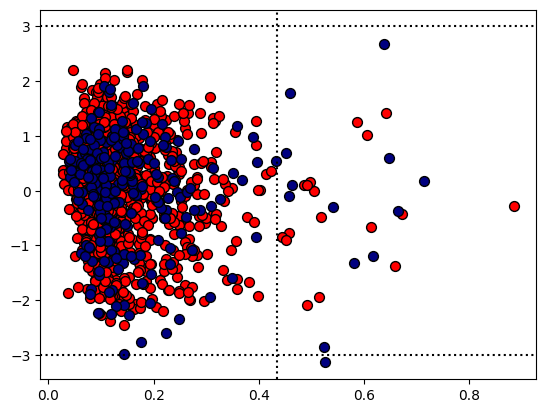

In [61]:
X_train_norm_ = X_train_norm.to_numpy()
X_test_norm_ = X_test_norm.to_numpy()

leverage_train = np.diag(X_train_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_train_norm_.T)
leverage_test = np.diag(X_test_norm_@ np.linalg.pinv(X_train_norm_.T @ X_train_norm_) @ X_test_norm_.T)


Y_train_model_6 = pd.DataFrame(Y_train)
Y_train_model_6['pred'] = Y_pred_train
Y_train_model_6['residual'] = Y_train_model_6['pIC50'] - Y_train_model_6['pred']
Y_train_model_6['squared'] = Y_train_model_6['residual']**2
mse_train = Y_train_model_6['squared'].sum()/(len(Y_train_model_6['squared']))
Y_train_model_6['leverage'] = leverage_train
Y_train_model_6['standard'] = Y_train_model_6['residual']/(mse_train)**0.5

Y_test_model_6 = pd.DataFrame(Y_test)
Y_test_model_6['pred'] = Y_pred_test
Y_test_model_6['residual'] = Y_test_model_6['pIC50'] - Y_test_model_6['pred']
Y_test_model_6['squared'] = Y_test_model_6['residual']**2
mse_test = Y_test_model_6['squared'].sum()/(len(Y_test_model_6['squared']))
Y_test_model_6['leverage'] = leverage_test
Y_test_model_6['standard'] = Y_test_model_6['residual']/(mse_test)**0.5

leverage_test = pd.DataFrame(leverage_test)
print(leverage_test[leverage_test>0.434].count())
leverage_train = pd.DataFrame(leverage_train)
print(leverage_train[leverage_train>0.434].count())

plt.scatter(Y_train_model_6['leverage'], Y_train_model_6['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test_model_6['leverage'], Y_test_model_6['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.434, color='black', linestyle='dotted')
